In [98]:
import scipy as sp
import numpy as np
data = sp.genfromtxt("WT001.csv", delimiter=",", names=True)

In [99]:
print sp.shape(data)

(5652,)


In [100]:
import matplotlib.pyplot as plt

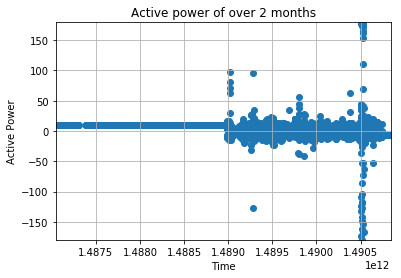

In [101]:
plt.scatter(data['timestamp'], data['WT001_WIND_DIRECTION'])
plt.title("Active power of over 2 months")
plt.xlabel("Time")
plt.ylabel("Active Power")
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [102]:
x = data['WT001_WIND_DIRECTION']
y = data['WT001_ACTIVE_POWER']
plt.scatter(x, y)
plt.title("Active power of over 2 months")
plt.xlabel("Wind Direction")
plt.ylabel("Active Power")
plt.autoscale(tight=True)
plt.grid()

In [103]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [104]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: %s" % fp1)

Model parameters: [   3.252576    862.60615472]


In [105]:
print residuals

f = 2.59619213 * x + 989.02487106

[  2.94275761e+09]


In [106]:
f1 = sp.poly1d(fp1)

In [107]:
print(error(f1, x, y))

2942757614.54


In [108]:
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")


In [109]:
f2p = sp.polyfit(x, y, 1)
print(f2p)

[   3.252576    862.60615472]


In [110]:
f2 = sp.poly1d(f2p)

In [111]:
print(error(f2, x, y))

2942757614.54


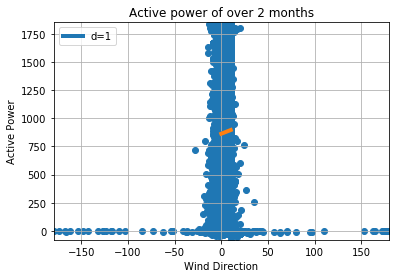

In [112]:
fx = sp.linspace(0,x[1], 1000) # generate X-values for plotting
plt.plot(fx, f2(fx), linewidth=4)
plt.legend(["d=%i" % f2.order], loc="upper left")
plt.show()

In [113]:
inflection1 = -25
inflection2 = 25
xa = x[:inflection1]
ya = y[:inflection1]

# xb = x[inflection1:inflection2] # data after
# yb = y[inflection1:inflection2]

# print ya
# print xb
xc = x[inflection2:] 
yc = y[inflection2:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
# fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fc = sp.poly1d(sp.polyfit(xc, yc, 1))

fa_error = error(fa, xa, ya)
# fb_error = error(fb, xb, yb)
fc_error = error(fc, xc, yc)

print("Error inflection=%f" % (fc_error))

Error inflection=2925647603.508437


In [114]:
print max(y), max(x)

1850.7 179.2


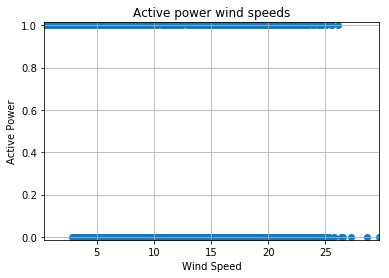

In [115]:

plt.scatter(data['WT001_WIND_SPEED'], data['WT001_ACTIVE_POWER'] <= 0)
plt.title("Active power wind speeds")
plt.xlabel("Wind Speed")
plt.ylabel("Active Power")
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [116]:
print sum(data['WT001_ACTIVE_POWER'] <= 0)

1083


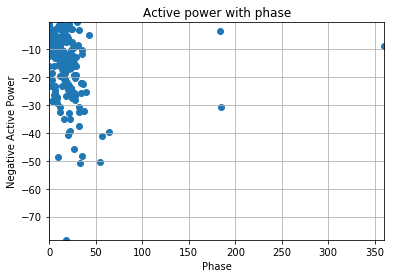

In [117]:
x = []
y = []
for d in data:
    if d['WT001_ACTIVE_POWER'] <= 0:
        x.append(d['WT001_PHASE_CURRENT_A'])
#         x.append(d['WT001_PHASE_VOLTAGE_A'])
        y.append(d['WT001_ACTIVE_POWER'])

plt.scatter(x, y)
plt.title("Active power with phase")
plt.xlabel("Phase")
plt.ylabel("Negative Active Power")
plt.autoscale(tight=True)
plt.grid()
plt.show()

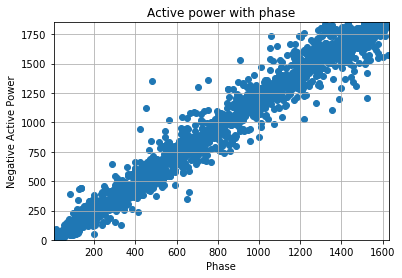

In [118]:
x = []
y = []
for d in data:
    if d['WT001_ACTIVE_POWER'] > 0:
        x.append(d['WT001_PHASE_CURRENT_A'])
#         x.append(d['WT001_PHASE_VOLTAGE_A'])
        y.append(d['WT001_ACTIVE_POWER'])

plt.scatter(x, y)
plt.title("Active power with phase")
plt.xlabel("Phase")
plt.ylabel("Negative Active Power")
plt.autoscale(tight=True)
plt.grid()
plt.show()